In [41]:
import numpy as np
import pandas as pd
from matplotlib import pylab
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [80]:
Ca_mean = 9.5
Ca_var = 0.4

In [81]:
Ca_exp = 9.57

In [82]:
dist = stats.norm(Ca_mean, Ca_var)
dist

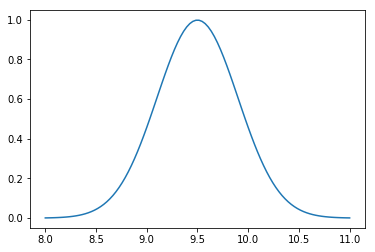

In [83]:
x = np.linspace(8, 11, 100)
plt.plot(x, dist.pdf(x))

In [85]:
2*(1-dist.pdf(Ca_exp))

0.03559995276310368

In [97]:
T = (Ca_exp - Ca_mean) / (Ca_var / np.sqrt(160))
2*(1 - stats.norm.cdf(T))

0.026856695507523787

In [20]:
from sklearn import model_selection, ensemble, linear_model

In [21]:
X = diamonds.drop(columns=['price'])
y = diamonds.price

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=1)

In [24]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
rf = ensemble.RandomForestRegressor(random_state=1, n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [27]:
lr_predict = lr.predict(X_test)
rf_predict = rf.predict(X_test)

In [32]:
lr_err = np.abs(y_test - lr_predict)
rf_err = np.abs(y_test - rf_predict)

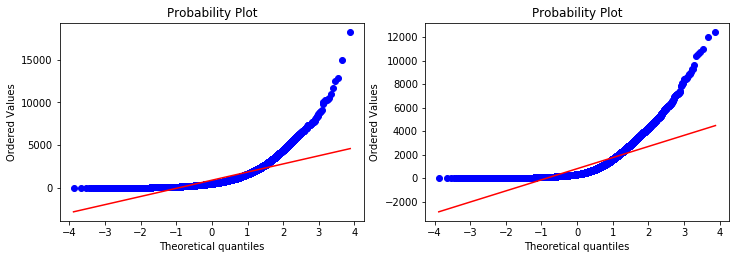

In [42]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(lr_err, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(rf_err, dist="norm", plot=pylab)
pylab.show()

In [43]:
scipy.stats.ttest_ind(lr_err, rf_err, equal_var = False)

Ttest_indResult(statistic=6.205418446787019, pvalue=5.534495566294121e-10)

In [ ]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(d, data.banner_b))

In [45]:
from statsmodels.stats.proportion import proportion_confint

In [52]:
stats.ttest_rel(abs(y_test - lr.predict(X_test)), 
                abs(y_test - rf.predict(X_test)))

Ttest_relResult(statistic=13.01772978387856, pvalue=1.6551745751413995e-38)

In [93]:
cm = CompareMeans(DescrStatsW(lr_err), DescrStatsW(rf_err))
cm.tconfint_diff() 

(59.83194833382869, 115.079817978469)